In [ ]:
# paths to results for lineage level predictions for NA, EU and Asia

results_CNT = "North_America/HPC/results/Connecticut_results.json"
results_NE = "Europe/HPC/results/Northern_Estonia_results.json" 
results_MH = "Asia/HPC /results/Maharashtra_results.json"

In [ ]:
import os
if os.path.isdir("figures") == False:
    os.mkdir("figures")

In [6]:
import json
from utils.helper_functions import * 
from utils.plotting_functions import * 
from statistics import mean,stdev 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from matplotlib.lines import Line2D


In [ ]:
# Prepare data for plotting
continents = ["North_America", "Europe", "Asia"]
locations = [["Connecticut", "USA", "North_America", "Global", "Global_next_regions"], ["Estonia", "Europe", "Global", "Global_next_regions"] , ["India", "Asia", "Global", "Global_next_regions"]]
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
results = [("North_America", results_CNT), ("Europe",results_NE), ("Asia", results_MH)]

all_results = dict()
all_mean_results = dict()
all_std_results = dict()

for ((continent, results_path), locs) in zip(results, locations):
    with open(results_path) as json_file:
        res_file = json.loads(json_file.read())
    # calculate absolute errors
    absolute_errors = calculate_absolute_errors(res_file, seeds, abundances, locs)
    # calculate  mean absolute errors per location & abundance
    mean_abs_errors = dict()
    stds = dict()
    for loc in locs:
        mean_abs_errors[loc] = dict()
        stds[loc] = dict()
        for ab in abundances:
            mean_abs_errors[loc][ab] = round(mean(absolute_errors[loc][ab].values()),2)
            stds[loc][ab] = round(stdev(absolute_errors[loc][ab].values()),2)

    all_results[continent] = absolute_errors
    all_std_results[continent] = stds
    all_mean_results[continent] = mean_abs_errors

# plot the mean absolute error per simulated abundance for each location in each continent
locations_colors = [[("Connecticut", "#984ea3") , ("USA", "#d55e00"), ("North_America", "#dede00") , ("Global", "#0072b2"), ("Global_next_regions", "#009e73")],
 [("Estonia", "#d55e00"), ("Europe", "#dede00"), ("Global", "#0072b2"), ("Global_next_regions", "#009e73")] ,
  [("India", "#d55e00"), ("Asia", "#dede00"), ("Global", "#0072b2"), ("Global_next_regions", "#009e73")]]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5),sharex=True, sharey=True)
fig.set_dpi(120)
for continent, ax, locs in zip(continents, [ax1,ax2, ax3], locations_colors):
    ax.grid()
    ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    # ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
    ax.set_title(continent.replace("_", " "))
    for (loc, col) in locs:
        ax.plot(abundances, list(all_mean_results[continent][loc].values()), color = col) #, list(all_std_results[continent][loc].values()), color = col)
        y = list(all_mean_results[continent][loc].values())
        std = list(all_std_results[continent][loc].values())
        addition = [sum(x) for x in zip(y, std)]
        substraction = [yi - stdi for yi, stdi in zip(y, std)]
        # comment out next line for non continuous error bars
        ax.fill_between(abundances, substraction, addition, color= col, alpha=0.15, interpolate=True)
        ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
        ax.grid(False)

custom_lines = [Line2D([0], [0], color = "#984ea3", lw=1),
                Line2D([0], [0], color = "#d55e00", lw=1),
                Line2D([0], [0], color = "#dede00", lw=1),
                Line2D([0], [0], color = "#0072b2", lw=1),
                Line2D([0], [0], color = "#009e73", lw=1)]

fig.legend(custom_lines,
 ["State\n(NA experiment only)", "Country", "Continent", "Global", "Global next regions"],
  loc="center right",   # Position of legend
  bbox_to_anchor=(1.12, 0.5)
)

fig.text(0.5, 0.015, 'Simulated abundance', va='center', ha='center', fontsize=13)
fig.text(0.07, 0.5, 'Absolute error', va='center', ha='center', rotation='vertical', fontsize=13)
fig.savefig("figures/lineplots.pdf", bbox_inches='tight')

plot voc level predictions vs lineage level predictions

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [ ]:
# paths to results for lineage level predictions and voc level predictions for the Connecticut experiment
results_CNT_who = "North_America/HPC/results/Connecticut_results_who.json"
results_CNT = "North_America/HPC/results/Connecticut_results.json"

# prepare data for plotting
import json
from utils.helper_functions import * 
from utils.plotting_functions import * 
from statistics import mean,stdev 

locations = [["Connecticut", "Global"], ["Connecticut", "Global"]]
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
results = [("Lineage level predictions", results_CNT), ("VOC level predictions", results_CNT_who)]

all_results = dict()
all_mean_results = dict()
all_std_results = dict()

for ((prediction_level, results_path), locs) in zip(results, locations):
    with open(results_path) as json_file:
        res_file = json.loads(json_file.read())
    # calculate absolute errors
    absolute_errors = calculate_absolute_errors(res_file, seeds, abundances, locs)
    # calculate  mean absolute errors per location & abundance
    mean_abs_errors = dict()
    stds = dict()
    for loc in locs:
        mean_abs_errors[loc] = dict()
        stds[loc] = dict()
        for ab in abundances:
            mean_abs_errors[loc][ab] = round(mean(absolute_errors[loc][ab].values()),2)
            stds[loc][ab] = round(stdev(absolute_errors[loc][ab].values()),2)

    all_results[prediction_level] = absolute_errors
    all_std_results[prediction_level] = stds
    all_mean_results[prediction_level] = mean_abs_errors

# plot the mean absolute error per simulated abundance for each location in each continent

prediction_level_colors = [[("Lineage level predictions", "#0072b2") , ("VOC level predictions", "#d55e00")],
 [("Lineage level predictions", "#0072b2") , ("VOC level predictions", "#d55e00")] ]

prediction_levels = ["Lineage level predictions", "VOC level predictions"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5),sharex=True, sharey=True)
fig.set_dpi(120)

for (loc, ax), precol in zip([("Connecticut", ax1), ("Global", ax2)], prediction_level_colors):
    ax.grid()
    ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
    ax.set_title(loc)
    
    for (pl, col) in precol:
        # print(list(all_mean_results[pl][loc].values()), list(all_std_results[pl][loc].values()))
        ax.plot(abundances, list(all_mean_results[pl][loc].values()) )#, list(all_std_results[pl][loc].values()), color = col) - for errorbar plot
        y = list(all_mean_results[pl][loc].values())
        std = list(all_std_results[pl][loc].values())
        addition = [sum(x) for x in zip(y, std)]
        substraction = [yi - stdi for yi, stdi in zip(y, std)]
        # comment out next line for non continuous error bars
        ax.fill_between(abundances, substraction, addition, color= col, alpha=0.2, interpolate=True)
        ax.grid(False)
        ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100])

custom_lines = [Line2D([0], [0], color = "#0072b2", lw=2),
                Line2D([0], [0], color = "#d55e00", lw=2)]

fig.legend(custom_lines,
  prediction_levels,
  loc="center right",   # Position of legend
  bbox_to_anchor=(1.15, 0.5)
)

fig.text(0.5, 0.015, 'Simulated abundance', va='center', ha='center', fontsize=13)
fig.text(0.07, 0.5, 'Absolute error', va='center', ha='center', rotation='vertical', fontsize=13)
fig.savefig("figures/lineplots_who.pdf", bbox_inches='tight')

Statistical analysis

In [1]:
# # run a t-test to compare the absolute error of the Connecticut predictions with the global predictions
# from scipy import stats
# import numpy as np

# locations = [["Connecticut", "Global"], ["Connecticut", "Global"]]
# seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
# results = [("Lineage level predictions", results_CNT), ("VOC level predictions", results_CNT_who)]

# all_results = dict()

# for ((prediction_level, results_path), locs) in zip(results, locations):
#     with open(results_path) as json_file:
#         res_file = json.loads(json_file.read())
#     # calculate absolute errors
#     absolute_errors = calculate_absolute_errors(res_file, seeds, abundances, locs)

#     all_results[prediction_level] = absolute_errors

# results_lineage_connecticut = all_results["Lineage level predictions"]["Connecticut"]

# results_lineage_global = all_results["Lineage level predictions"]["Global"]

# results_voc_connecticut = all_results["VOC level predictions"]["Connecticut"]
# results_voc_global = all_results["VOC level predictions"]["Global"]

# # calculate the t-test for each abundance
# p_values_voc = dict()
# p_values_lineage = dict()
# for ab in abundances:
#     p_values_voc[ab] = stats.ttest_ind(list(results_voc_connecticut[ab].values()), list(results_voc_global[ab].values()), equal_var=False)[1]
#     # p_values_lineage[ab] = stats.ttest_ind(list(results_lineage_connecticut[ab].values()), list(results_lineage_global[ab].values()), equal_var=False)[1]

# print("VOC level: ", p_values_voc, "\n", "Lineage level:", p_values_lineage)

In [2]:
# paths to results for lineage level predictions and voc level predictions for the Connecticut experiment
results_CNT_who = "North_America/HPC/results/Connecticut_results_who.json"
results_CNT = "North_America/HPC/results/Connecticut_results.json"

# paths to results for lineage level predictions and voc level predictions for the Estonian experiment
results_EST_who = "Europe/HPC/results/Northern_Estonia_results_who.json"
results_EST = "Europe/HPC/results/Northern_Estonia_results.json"

# paths to results for lineage level predictions and voc level predictions for the Indian experiment
results_IND_who = "Asia/HPC /results/Maharashtra_results_who.json"
results_IND = "Asia/HPC /results/Maharashtra_results.json"


In [65]:
from scipy import stats


continents_locations = [("North_America", "Connecticut"), ("Europe", "Estonia"),  ("Asia", "India")]
reference_sets = [[ "USA", "North_America", "Global", "Global_next_regions"], [ "Europe", "Global", "Global_next_regions"] , [ "Asia", "Global", "Global_next_regions"]]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
results = [("North_America", results_CNT), ("Europe",results_EST), ("Asia", results_IND)]
results_who = [("North_America", results_CNT_who), ("Europe",results_EST_who), ("Asia", results_IND_who)]
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
abundances = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
locations = [["Connecticut", "USA", "North_America", "Global", "Global_next_regions"], ["Estonia", "Europe", "Global", "Global_next_regions"] , ["India", "Asia", "Global", "Global_next_regions"]]

# lodad the results for lineage level predictions
all_results = dict()

for ((continent, results_path), locs) in zip(results, locations):
    with open(results_path) as json_file:
        res_file = json.loads(json_file.read())
    # calculate absolute errors
    absolute_errors = calculate_absolute_errors(res_file, seeds, abundances, locs)
  
    all_results[continent] = absolute_errors

# lodad the results for voc level predictions
all_results_who = dict()

for ((continent, results_path), locs) in zip(results_who, locations):
    with open(results_path) as json_file:
        res_file = json.loads(json_file.read())
    # calculate absolute errors
    absolute_errors = calculate_absolute_errors(res_file, seeds, abundances, locs)
  
    all_results_who[continent] = absolute_errors

p_values_voc = dict()
p_values_lineage = dict()

# calculate the p-values for lineage level predictions
for ((continent, location), datasets) in zip(continents_locations, reference_sets):
    p_values_lineage[location] = dict()
    for dataset in datasets:
        p_values_lineage[location][dataset] = dict()
        for ab in abundances:
            p_values_lineage[location][dataset][ab] = dict()
            # values for the local dataset
            local_dataset = all_results[continent][location][ab]
            # values for the other dataset
            other_dataset = all_results[continent][dataset][ab]
            # calculate the p-value for the two-sided t-test
            p_value_two_sided = stats.ttest_ind(list(local_dataset.values()), list(other_dataset.values()), equal_var=False)[1]
            p_values_lineage[location][dataset][ab]["two sided"] = p_value_two_sided
            #  calculate the p-value for the one-sided t-test
            p_value_one_sided = stats.ttest_ind(list(local_dataset.values()), list(other_dataset.values()), equal_var=False, alternative='less')[1]
            p_values_lineage[location][dataset][ab]["one sided"] = p_value_one_sided

            
# calculate the p-values for voc level predictions
for ((continent, location), datasets) in zip(continents_locations, reference_sets):
    p_values_voc[location] = dict()
    for dataset in datasets:
        p_values_voc[location][dataset] = dict()
        for ab in abundances:
            p_values_voc[location][dataset][ab] = dict()
            # values for the local dataset
            local_dataset = all_results_who[continent][location][ab]
            # values for the other dataset
            other_dataset = all_results_who[continent][dataset][ab]
            # calculate the p-value for the two-sided t-test
            p_value_two_sided = stats.ttest_ind(list(local_dataset.values()), list(other_dataset.values()), equal_var=False)[1]
            p_values_voc[location][dataset][ab]["two sided"] = p_value_two_sided
            #  calculate the p-value for the one-sided t-test
            p_value_one_sided = stats.ttest_ind(list(local_dataset.values()), list(other_dataset.values()), equal_var=False, alternative='less')[1]
            p_values_voc[location][dataset][ab]["one sided"] = p_value_one_sided

# convert the results to dataframes
for continent, location in continents_locations:
    df_voc = pd.DataFrame.from_dict(p_values_voc[location])
    df_lineage = pd.DataFrame.from_dict(p_values_lineage[location])
    # save the results as csv files
    df_voc.to_csv("statistical_analysis_HPC/" + location + "_p_values_voc.csv")
    df_lineage.to_csv("statistical_analysis_HPC/" + location + "_p_values_lineage.csv")


/var/folders/97/763sgtn56x9c2qm2j_swrsyw0000gp/T/ipykernel_21650/801729340.py:50: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  p_value_two_sided = stats.ttest_ind(list(local_dataset.values()), list(other_dataset.values()), equal_var=False)[1]
/var/folders/97/763sgtn56x9c2qm2j_swrsyw0000gp/T/ipykernel_21650/801729340.py:53: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  p_value_one_sided = stats.ttest_ind(list(local_dataset.values()), list(other_dataset.values()), equal_var=False, alternative='less')[1]


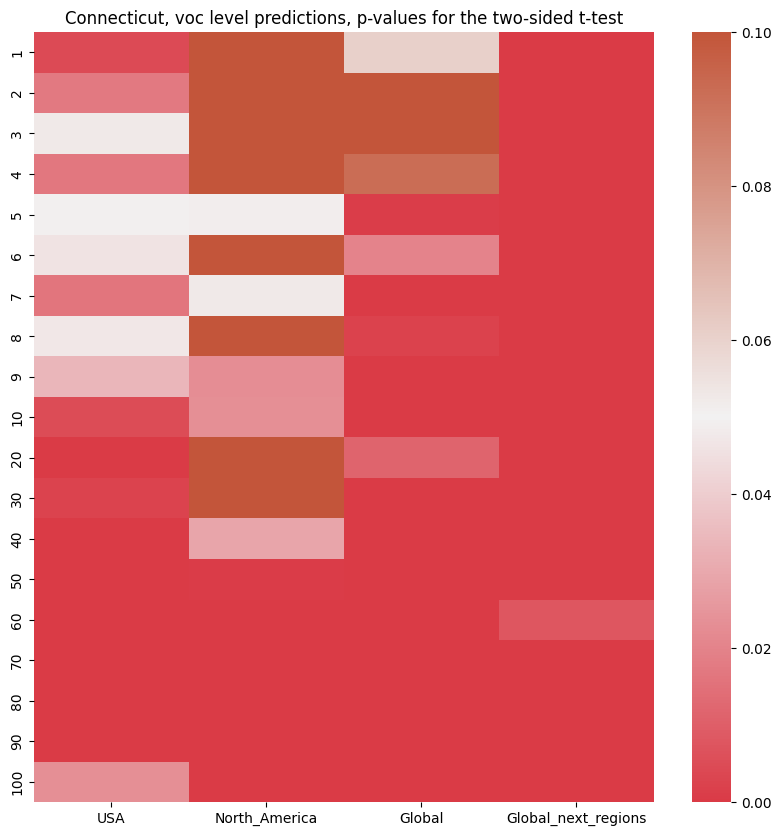

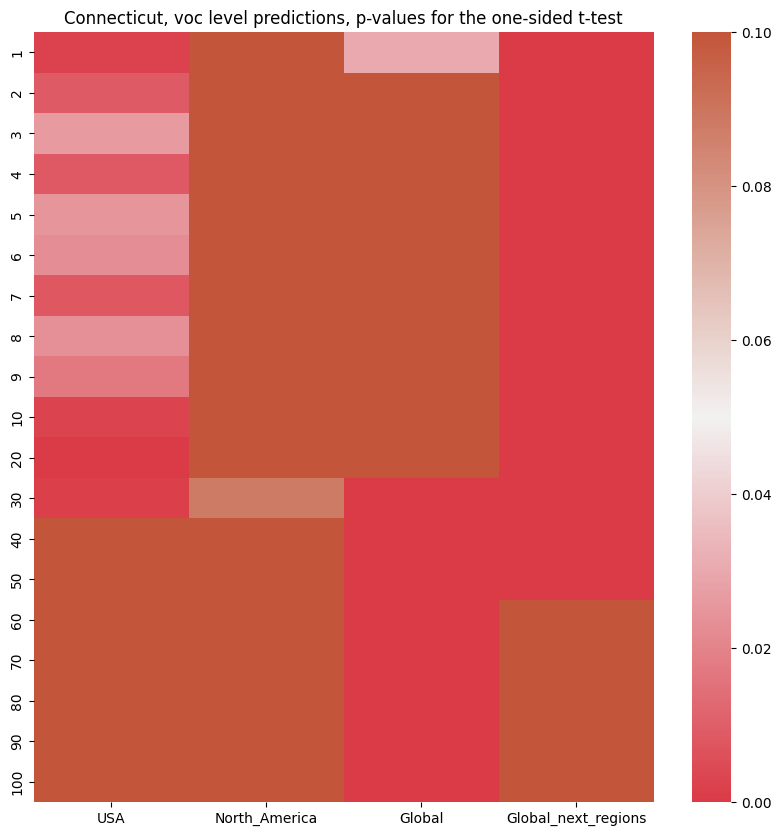

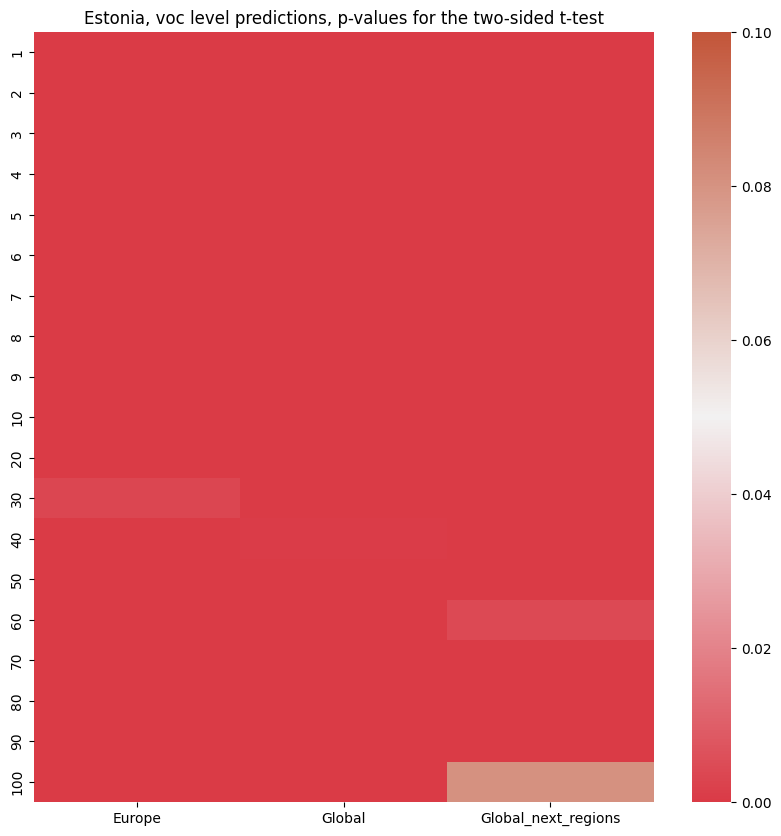

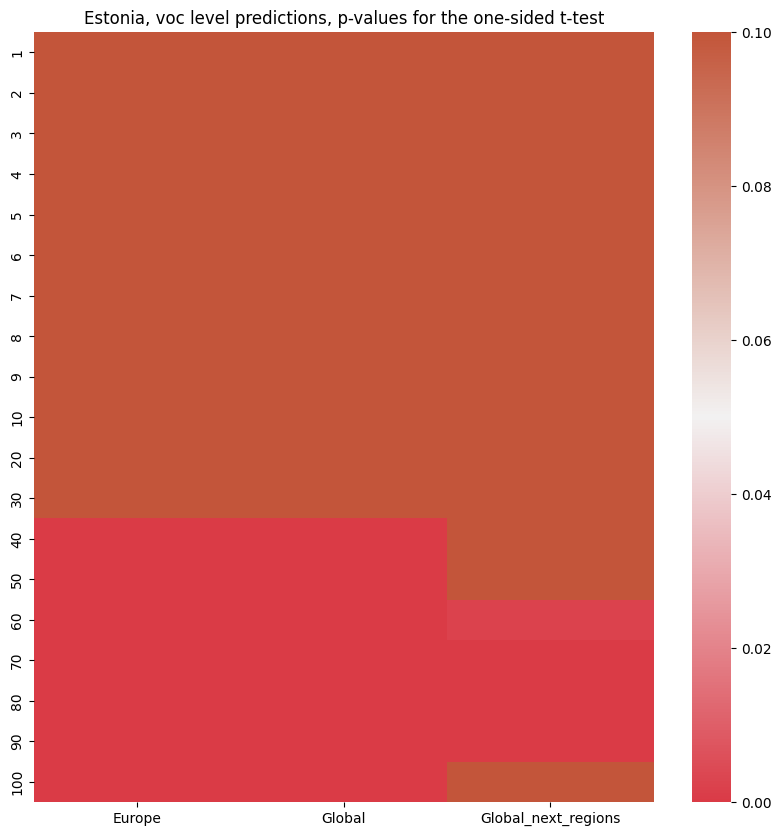

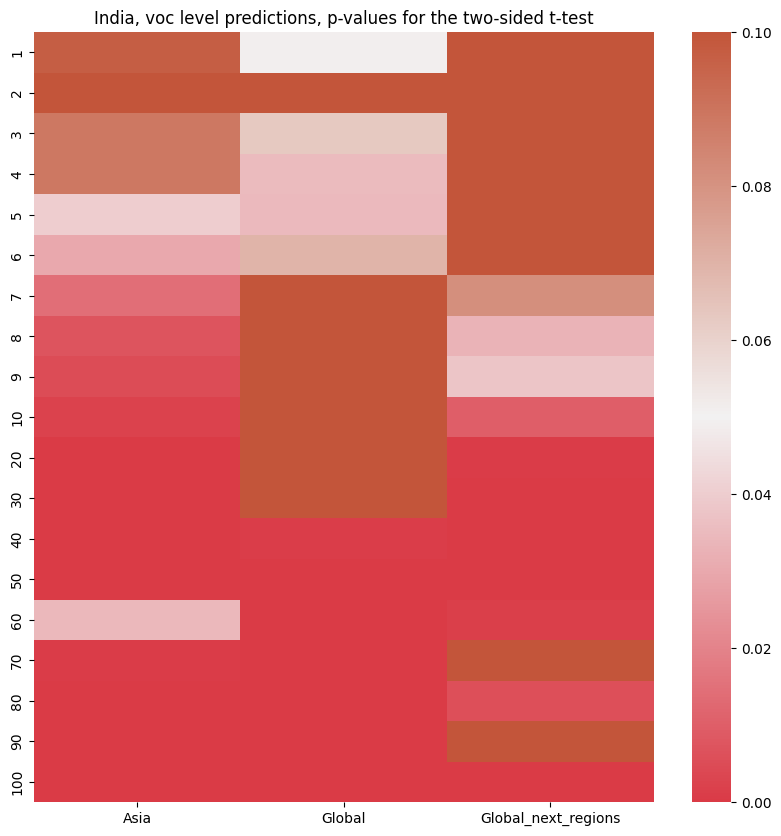

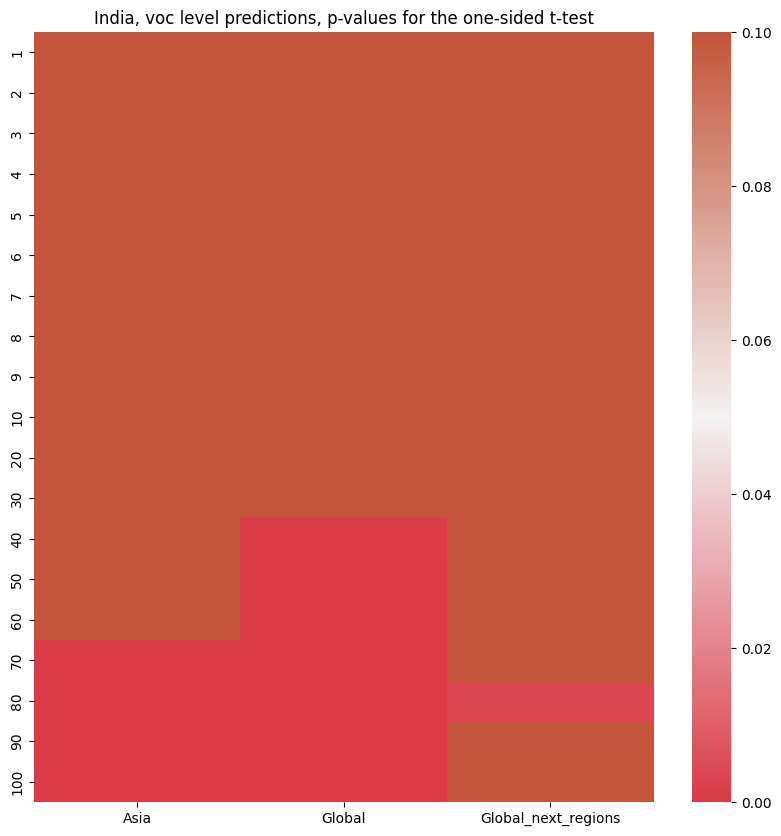

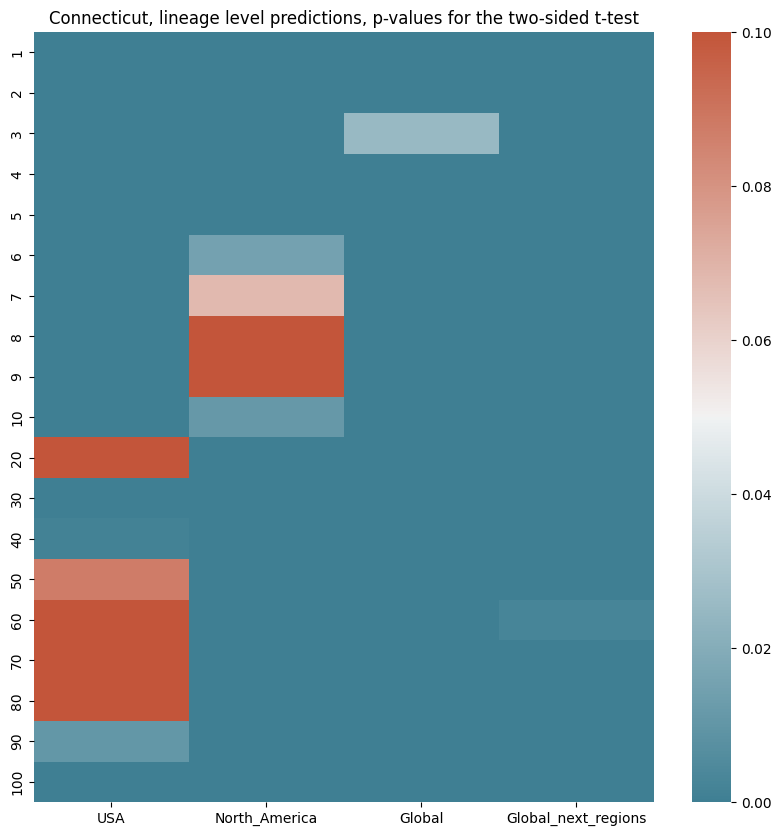

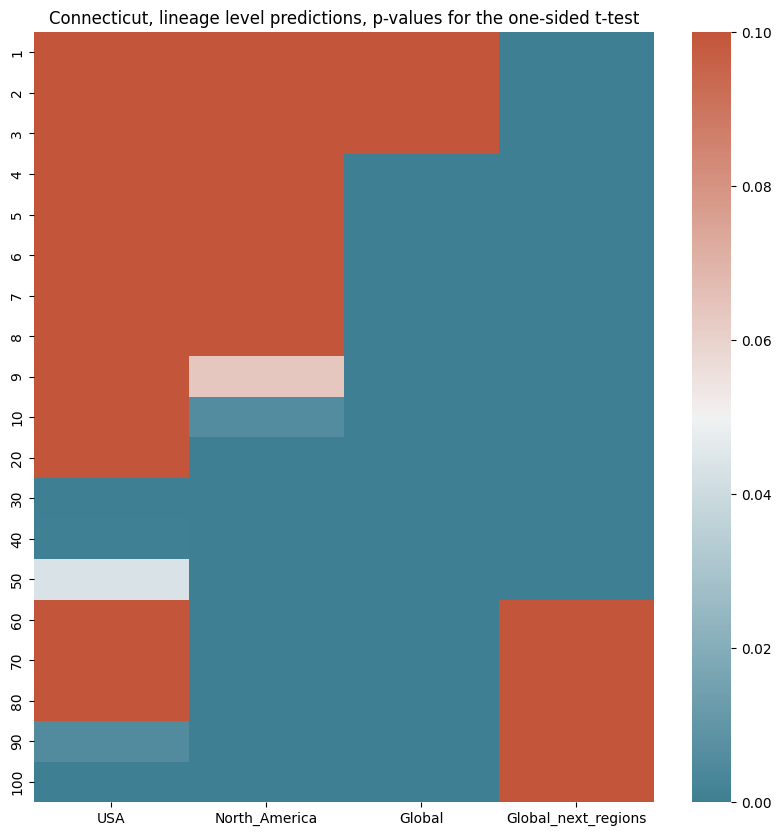

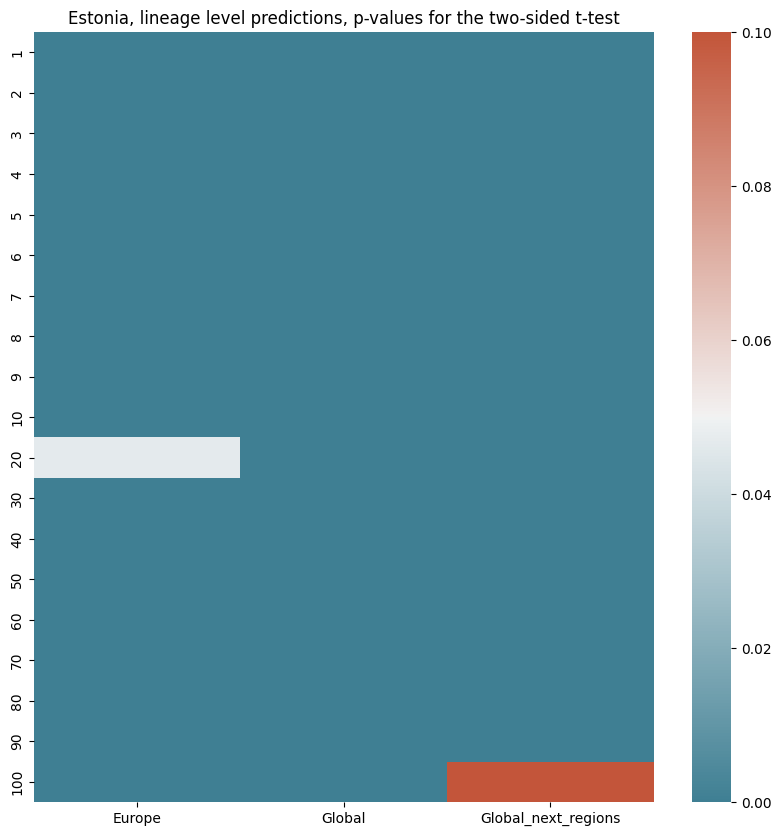

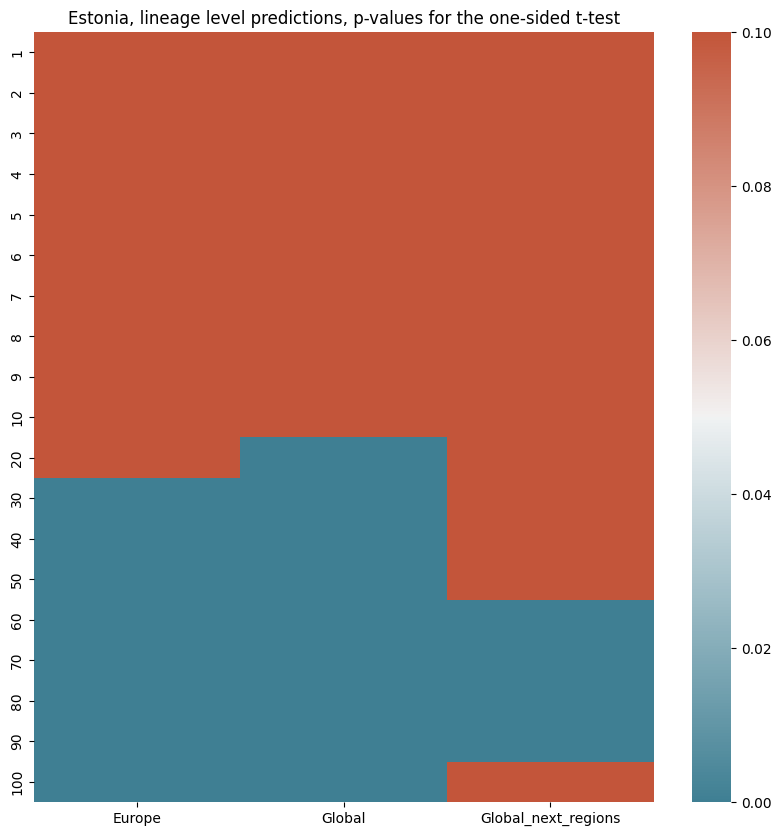

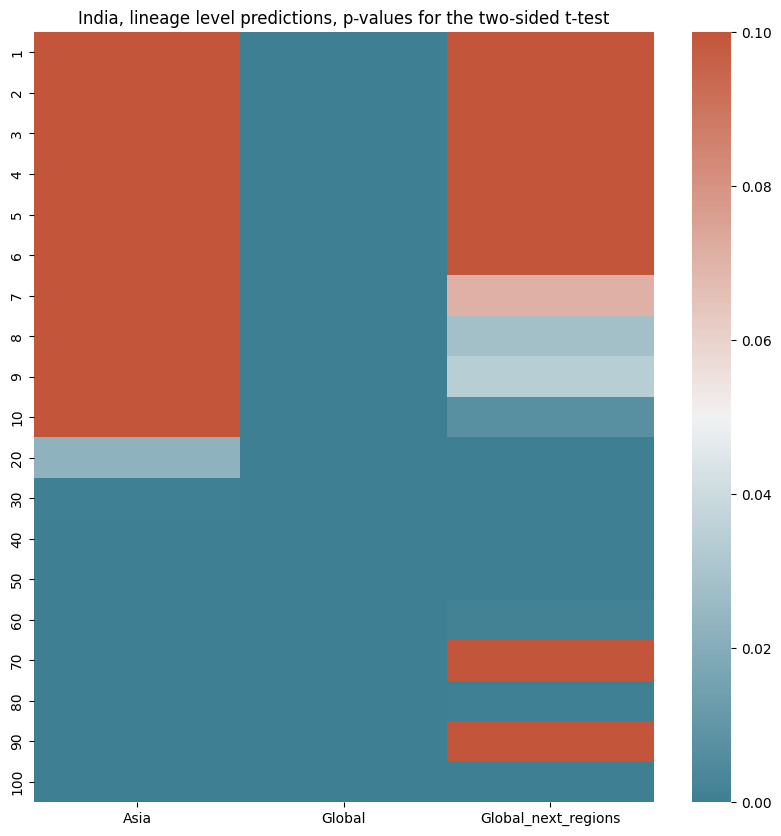

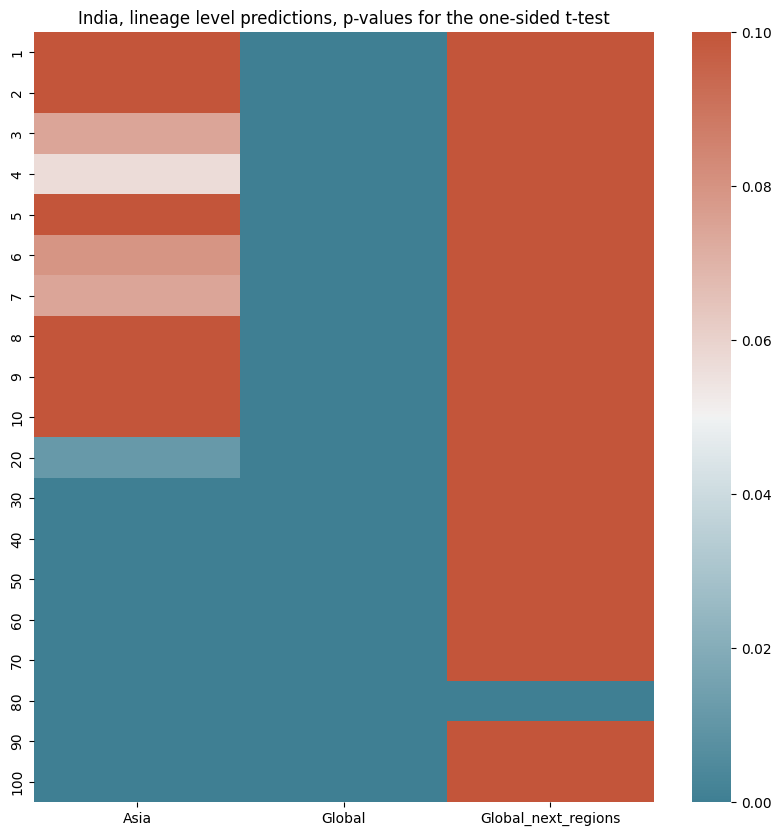

In [74]:
# plot heatmap for voc level predictions and p-values for the two-sided t-test for the Connecticut experiment

import matplotlib.pyplot as plt
import seaborn as sns

# generate heatmaps for all experiments
for continent, location in continents_locations:
    df = pd.read_csv("statistical_analysis_HPC/" + location + "_p_values_voc.csv" , index_col=0)
    ar_2_sided = np.zeros((len(df.index), len(df.columns)))
    ar_1_sided = np.zeros((len(df.index), len(df.columns)))
    for i, indx1 in enumerate(df.index):
        for j, indx2 in enumerate(df.columns):
           ar_2_sided[i,j] = float(df.loc[indx1,indx2].split(",")[0].split(":")[1].replace("}", ""))
           ar_1_sided[i,j] = float(df.loc[indx1,indx2].split(",")[1].split(":")[1].replace("}", ""))
    
    fig, ax = plt.subplots(figsize=(10,10))
    cmap = cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(ar_2_sided, cmap=cmap, ax=ax, xticklabels=df.columns, yticklabels=df.index, vmin=0, vmax = 0.1)
    ax.set_title(location + ", voc level predictions, p-values for the two-sided t-test")
    plt.savefig("statistical_analysis_HPC/" + location + "_voc_level_predictions_p_values_two_sided_t_test.png", transparent=True)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(ar_1_sided, cmap=cmap, ax=ax, xticklabels=df.columns, yticklabels=df.index, vmin=0, vmax = 0.1)
    ax.set_title(location + ", voc level predictions, p-values for the one-sided t-test")
    plt.savefig("statistical_analysis_HPC/" + location + "_voc_level_predictions_p_values_one_sided_t_test.png", transparent=True)


# do the same for lineage level predictions
for continent, location in continents_locations:
    df = pd.read_csv("statistical_analysis_HPC/" + location + "_p_values_lineage.csv" , index_col=0)
    ar_2_sided = np.zeros((len(df.index), len(df.columns)))
    ar_1_sided = np.zeros((len(df.index), len(df.columns)))
    for i, indx1 in enumerate(df.index):
        for j, indx2 in enumerate(df.columns):
           ar_2_sided[i,j] = float(df.loc[indx1,indx2].split(",")[0].split(":")[1].replace("}", ""))
           ar_1_sided[i,j] = float(df.loc[indx1,indx2].split(",")[1].split(":")[1].replace("}", ""))
    
    fig, ax = plt.subplots(figsize=(10,10))
    cmap = cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(ar_2_sided, cmap=cmap, ax=ax, xticklabels=df.columns, yticklabels=df.index, vmin=0, vmax = 0.1)
    ax.set_title(location + ", lineage level predictions, p-values for the two-sided t-test")
    plt.savefig("statistical_analysis_HPC/" + location + "_lineage_level_predictions_p_values_two_sided_t_test.pdf")
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(ar_1_sided, cmap=cmap, ax=ax, xticklabels=df.columns, yticklabels=df.index, vmin=0, vmax = 0.1)
    ax.set_title(location + ", lineage level predictions, p-values for the one-sided t-test")
    plt.savefig("statistical_analysis_HPC/" + location + "_lineage_level_predictions_p_values_one_sided_t_test.pdf")

